# pandas Series

In [84]:
%matplotlib inline
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt

3.3.5 |Anaconda 2.2.0 (64-bit)| (default, Sep  2 2014, 13:55:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
1.9.2
0.15.2


The series is one of the foundations of pandas as we saw in the previous video. it’s got a lot of helpful add ons that bring more expressive power to the NumPy Array.

Now I'm sure at this point you're getting tired of "toy data" or fake, generated date. Personally I always get tired when we use a lot of made up data but I promise you, promise that we’re going to get to the good stuff very soon. 

It’s important to cover a lot of these bases before you get in over your head.

Above you're going to see a lot of imports. The purpose of that is for you to understand what version of everything this code was run on. It can help you (and us as instructors) debug any potential issues. You don't have to use all these imports - they're just here to help. 

This is the import that we’ll be using from here on out, it gives you the python and pandas versions and sets some default styling which I’ll get to when we cover plotting.

Now let's get started with the Series. I’m going to create a random range of integers from 1,20 and get 26 of them.

In [85]:
np.random.seed(125)
raw_np_range = np.random.random_integers(1,20,26)

Now I’ll convert that into a panda series using pd.Series.from_array. 

In [86]:
data = pd.Series.from_array(raw_np_range)

Since this is an array, we can actually just pass it into the Series object and create it that way as well.

In [87]:
pd.Series(raw_np_range)

0      3
1      4
2     15
3     14
4     12
5      1
6      6
7      3
8     14
9      1
10    19
11    13
12     1
13     3
14    10
15     4
16    13
17    16
18    13
19     8
20    10
21    10
22    18
23     5
24     5
25    12
dtype: int64

Pandas is pretty smart about figuring out what you're trying to do but it won't always get it. If you're having trouble creating an object, try to "dumb it down" for the computer - make it a simple array or something similar.

Now the Series like a numpy array, will take a best guess at what "type" of data is in the array.

In [88]:
pd.Series(['h',1,1.0])

0    h
1    1
2    1
dtype: object

The object type is the least specific, it can house python objects, strings, pretty much anything. Like Numpy, if you've got a float in your list, it'll default to the float type.

In [89]:
pd.Series([1.0,1,2])

0    1
1    1
2    2
dtype: float64

Like a NumPy array, we can specify the type at creation as well.

In [90]:
pd.Series([1.0,1,2], dtype=np.float16)

0    1
1    1
2    2
dtype: float16

We can also specify an index when we create a Series, this is helpful if you've got a special way that you want to query the data.

In [91]:
pd.Series(list(range(5)),index=list('abcde'))

a    0
b    1
c    2
d    3
e    4
dtype: int64

Now that we've gone through how to create a Series, let's try some Series methods to learn a little bit more about querying in pandas.

In [92]:
data

0      3
1      4
2     15
3     14
4     12
5      1
6      6
7      3
8     14
9      1
10    19
11    13
12     1
13     3
14    10
15     4
16    13
17    16
18    13
19     8
20    10
21    10
22    18
23     5
24     5
25    12
dtype: int64

Again like numpy we're going to have a shape as well as a length.

In [93]:
data.shape

(26,)

In [94]:
len(data)

26

Like we saw briefly in the last video, all pandas types has `heads` and `tails` which basically means take values off the front of the list of the back of the list.

In [95]:
print(data.head())
print(data.tail())

0     3
1     4
2    15
3    14
4    12
dtype: int64
21    10
22    18
23     5
24     5
25    12
dtype: int64


We can specify the number of values that we would like returned as well.

In [96]:
data.head(2)

0    3
1    4
dtype: int64

In [97]:
data.tail(10)

16    13
17    16
18    13
19     8
20    10
21    10
22    18
23     5
24     5
25    12
dtype: int64

Now since we're working with a list of numbers, it can be helpful to get a lot of the numerical properties of this list. Like NumPy, the Series makes this exceptionally easy.

In [98]:
data.mean()

8.9615384615384617

In [99]:
data.mode()

0     1
1     3
2    10
3    13
dtype: int64

In [100]:
data.median()

10.0

In [101]:
data.count()

26

Even cooler is we can get the unique values and the counts of values with one method as well.

In [102]:
data.unique()

array([ 3,  4, 15, 14, 12,  1,  6, 19, 13, 10, 16,  8, 18,  5])

In [103]:
data.value_counts()

13    3
10    3
3     3
1     3
14    2
12    2
5     2
4     2
19    1
18    1
16    1
15    1
8     1
6     1
dtype: int64

Getting these `summary statistics` is such a common function that they're actually wrapped in a simple method call called `describe`. Think if it like getting a simple description of the data.

In [104]:
data.describe()

count    26.000000
mean      8.961538
std       5.574806
min       1.000000
25%       4.000000
50%      10.000000
75%      13.000000
max      19.000000
dtype: float64

Now while we’re at it I think this would be an appropriate time to show you our first graphical representation. We just created a frequency distribution, or the number of counters per value. It would be helpful to see that graphically as well represented as a histogram.

We can make that extremely simply with the .hist() command. 

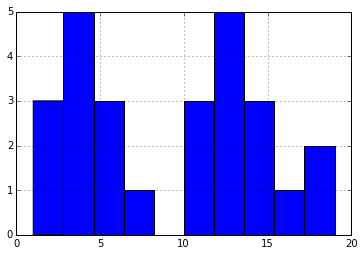

In [105]:
data.hist()

Now we’ve got our first graph! On that note we’ll end this video but I hope you are starting to see how expressive pandas can be. We've done some relatively intensive things will just a few function calls. This is what makes python and pandas so powerful. You're operating with a first class programming language and within that you've got an easy matrix style numerical representation.

Let's continue!

## Look Ups and Indexes

Let's dive deeper into getting data (either values or portions) out of our pandas Series. Now this should feel somewhat familiar from our work in NumPy and with lists. Let's first start by getting a specific value out of our data.

In [106]:
data

0      3
1      4
2     15
3     14
4     12
5      1
6      6
7      3
8     14
9      1
10    19
11    13
12     1
13     3
14    10
15     4
16    13
17    16
18    13
19     8
20    10
21    10
22    18
23     5
24     5
25    12
dtype: int64

In [107]:
r_data = data.copy()
r_data.index = reversed(range(26))
r_data

25     3
24     4
23    15
22    14
21    12
20     1
19     6
18     3
17    14
16     1
15    19
14    13
13     1
12     3
11    10
10     4
9     13
8     16
7     13
6      8
5     10
4     10
3     18
2      5
1      5
0     12
dtype: int64

In [108]:
data[20]

10

In [109]:
r_data[20]

1

Now remember, we are not querying by row (as much as it might seem like it. That's why we created the reversed index. To drive home the point that we're working with an index, not by a row.

Because we are working with an index we can fetch multiple indeces easily as well.

In [110]:
data[[10,20]]

10    19
20    10
dtype: int64

In [111]:
r_data[[10,20]]

10    4
20    1
dtype: int64

We can see here that it returned this as another pandas series with those index values as well. This will come in handy later on.

Now, we mentioned above that when we are querying in a dictionary lookup style on a series we're querying the index. That's not *exactly* true because if we don't have a numerical index, it will look up by numerical row/index number.

In [112]:
d2 = data.copy() 
# copy creates a copy of the data so we don't modify the original one

In [113]:
import string

In [114]:
d2.index = list(string.ascii_uppercase)
d2.head()

A     3
B     4
C    15
D    14
E    12
dtype: int64

In [115]:
d2[4]

12

We can of course query by the actual index values or with multiple values, or a list of values.

In [116]:
d2['E']

12

In [117]:
d2[[0,4]]

A     3
E    12
dtype: int64

In [118]:
d2[0:4]

A     3
B     4
C    15
D    14
dtype: int64

In [119]:
d2[['A','D']]

A     3
D    14
dtype: int64

Now things are going to start to get a bit tricky because you're going to see why it's so important to make sure that you understand which index you're working on. We're going to be working off of a portion of the original Series.

In [120]:
data

0      3
1      4
2     15
3     14
4     12
5      1
6      6
7      3
8     14
9      1
10    19
11    13
12     1
13     3
14    10
15     4
16    13
17    16
18    13
19     8
20    10
21    10
22    18
23     5
24     5
25    12
dtype: int64

In [122]:
d3 = data[5:10]
d3

5     1
6     6
7     3
8    14
9     1
dtype: int64

We can see here that this is numerical based with a numerical index, so let's query for the number 5.

In [123]:
d3[5]

1

Works just as expected, now let's query for zero.

In [124]:
d3[0]

KeyError: 0

We get a key error because that value doesn't exist in the index so you've always got to keep your indexing straight. If we want to enforce getting by row number we have to use to use the `iget` method which allows us to query for one or many values.

In [126]:
d3.iget(0)

1

In [127]:
d3.iget([0,3])

5     1
8    14
dtype: int64

In [128]:
d3

5     1
6     6
7     3
8    14
9     1
dtype: int64

We can also use the `iloc` look up to do the same thing. Think about this as the index-location however notice how it's dictionary style instead of a method call.

In [130]:
d3.iloc[[0,3]]

5     1
8    14
dtype: int64

Now there's one another style of look up that we need to go over. What if in our processing we want to get a certain value and if it doesn't exist we just want to fill it in with a `NaN` value or just ignore that it doesn't exist. We can do that with the `ix` look up which will query by index value and fail silently by replacing a missing index value with `NaN`.

In [134]:
d3.ix[[0,7,12]]

0    NaN
7      3
12   NaN
dtype: float64

So now we’ve seen a couple of different methods and properties that help you look things up along the index. So which is best? 

That’s a harder question to answer because some are more efficient than others in some circumstances. My recommendation would be that you try and be explicit with your commands and be careful about confusing indexes. I try to use dictionary style lookups, iloc and ix.

## Boolean Selection

Now that we better understand these explicit ways of querying data, we can talk about boolean selection which is going to start feeling really familiar. Let’s see which values are under 10.

In [136]:
data

0      3
1      4
2     15
3     14
4     12
5      1
6      6
7      3
8     14
9      1
10    19
11    13
12     1
13     3
14    10
15     4
16    13
17    16
18    13
19     8
20    10
21    10
22    18
23     5
24     5
25    12
dtype: int64

In [139]:
lt10 = data < 10
lt10

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7      True
8     False
9      True
10    False
11    False
12     True
13     True
14    False
15     True
16    False
17    False
18    False
19     True
20    False
21    False
22    False
23     True
24     True
25    False
dtype: bool

In [140]:
data[lt10]

0     3
1     4
5     1
6     6
7     3
9     1
12    1
13    3
15    4
19    8
23    5
24    5
dtype: int64

Of course we don't have to save this as an intermediate value either, we can just inline this selection.

In [141]:
data[data < 10]

0     3
1     4
5     1
6     6
7     3
9     1
12    1
13    3
15    4
19    8
23    5
24    5
dtype: int64

Just like with numpy we can’t just throw in multiple selections. We have to use the & or | symbols. Of course we can just do these one by one too because we are lining things up by index label.

In [142]:
data[data < 10 and data > 5]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [143]:
# & or | instead of 'and' or 'or' keywords, although with parenthesis
data[(data < 10) & (data > 5)]

6     6
19    8
dtype: int64

We can also chain queries rather than doing it all in one statement. This is equivalent to an and statement.

In [144]:
data[data < 10][data > 5]

6     6
19    8
dtype: int64

There are times when you may not care how many values are in an array you just want to know if any satisfy a boolean requirement, say less than two. This is where the any and all keywords come in. `Any` will tell you if any of the values are true. You can either wrap it in parenthesis or just use it as a query like I did with the two examples above.

In [148]:
data[data < 10].any()

True

In [149]:
data[data > 50].any()

False

In [150]:
(data > 50).any()

False

`All` will check it all values are True.

In [151]:
(data > 0).all()

True

In [152]:
(data > 10).all()

False

In [153]:
data > 5

0     False
1     False
2      True
3      True
4      True
5     False
6      True
7     False
8      True
9     False
10     True
11     True
12    False
13    False
14     True
15    False
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23    False
24    False
25     True
dtype: bool


Now one thing we can take advantage of in pandas is that sum will count True as 1 and False as 0. So performing a sum of these boolean selections allows you to get the counts pretty easily.


In [154]:
(data > 5).sum()

16

## Slicing


Now let’s get to slicing which we’ve seen a bit of thus far. Slicing is done in the dictionary look up style but gives us some handy ways of slicing data. Just like we might be slicing an array. 


In [162]:
data.head()

0     3
1     4
2    15
3    14
4    12
dtype: int64

In [163]:
r_data.head()

25     3
24     4
23    15
22    14
21    12
dtype: int64

In [157]:
data[0:5]

0     3
1     4
2    15
3    14
4    12
dtype: int64

In [160]:
r_data[0:5]

25     3
24     4
23    15
22    14
21    12
dtype: int64

We can see here that this slice is going by the 0 based look up with a numerical index or a string index. We can also do it in steps, up to a certain value, or over a certain value.


In [164]:
data[0:10:2]

0     3
2    15
4    12
6     6
8    14
dtype: int64

In [165]:
data[:5]

0     3
1     4
2    15
3    14
4    12
dtype: int64

In [167]:
data[20:]

20    10
21    10
22    18
23     5
24     5
25    12
dtype: int64

We can also do it backwards from the end of the array which is equivalent to the tail command we say above.


In [168]:
data[-2:]

24     5
25    12
dtype: int64

In [169]:
data.tail(2)

24     5
25    12
dtype: int64


However with slicing we can substitute so we’ve got to be careful. We aren’t using a copy of the data, we are using the original data. This means that any replacement of values that we do trickles down into the original list.

In [170]:
data.head()

0     3
1     4
2    15
3    14
4    12
dtype: int64

In [172]:
d4 = data.head()
d4

0     3
1     4
2    15
3    14
4    12
dtype: int64

In [176]:
d4[0] = 10000

In [177]:
data

0     10000
1         4
2        15
3        14
4        12
5         1
6         6
7         3
8        14
9         1
10       19
11       13
12        1
13        3
14       10
15        4
16       13
17       16
18       13
19        8
20       10
21       10
22       18
23        5
24        5
25       12
dtype: int64

That’s really something to be aware of and can get you in a ton of trouble. In fact it happened while I was writing this very notebook. Just make sure that if you're going to change a Series, be sure to make a `copy` of it so that you don't modify the original one.

The fundamental question is whether you’re modifying a copy of a Series or the original Series. If you run into some bugs, be sure to know when you're actually modifying the original series or dataframe.

In [178]:
d5 = data.head().copy()

In [179]:
d5[0] = 2000

In [180]:
data

0     10000
1         4
2        15
3        14
4        12
5         1
6         6
7         3
8        14
9         1
10       19
11       13
12        1
13        3
14       10
15        4
16       13
17       16
18       13
19        8
20       10
21       10
22       18
23        5
24        5
25       12
dtype: int64

## NaN Values

*working on 4-3*